In [1]:
import pandas as pd
import numpy as np
import os
import warnings

In [2]:
warnings.filterwarnings("ignore")

# Functions

In [3]:
def merge_data_according_to_area_level(file_path, combined_data):
    df = pd.read_csv(file_path, encoding='utf-8')
    df.columns = df.columns.str.lower()
    if 'year' in file_path:
        return combined_data

    month = file_path.split('/')[-1].split('_')[0].split('\\')[-1]
    df['month'] = month
    if combined_data.empty:
        return df

    common_columns = list(set(df.columns) & set(combined_data.columns))
    combined_data = pd.concat([combined_data, df], axis=0, ignore_index=True, join='outer', keys=common_columns)
    return combined_data

In [4]:
def sort_area_ids(df, col_name):
    # Extract the numeric part from the 'oslaua' column
    df['Numeric_Part'] = df[col_name].str.extract(r'E(\d+)').astype(int)

    # Sort the DataFrame based on the numeric part
    df_sorted = df.sort_values(by='Numeric_Part')

    # Drop the temporary column used for sorting
    df_sorted.drop(columns=['Numeric_Part'], inplace=True)

    # Reset the index and drop the temporary index column
    df_sorted = df_sorted.reset_index()
    df_sorted = df_sorted.drop(columns=['index'])

    return df_sorted

# 1. Importing our datasets
### (A) Merge Area Levels DataSets:
(i) Create a new Empty DataSet for each of the area levels

(ii) Add all columns from the first dataset adding a new column for the month at which the data was collected

def merge_data_according_to_area_level(dataset, file_path, combined_data):
    df = pd.read_csv(file_path, encoding='utf-8')
    df.columns = df.columns.str.lower()
    if combined_data.empty:
        
    

In [5]:
folder_path_area_levels = 'AreaLevels'
borough_mon_by_mon = pd.DataFrame()
lsoa_mon_by_mon = pd.DataFrame()
osward_mon_by_mon = pd.DataFrame()
msoa_mon_by_mon = pd.DataFrame()

for file_name in os.listdir(folder_path_area_levels):
    try:
        full_file_path = os.path.join(folder_path_area_levels, file_name)
        if 'borough' in full_file_path:
            borough_mon_by_mon = merge_data_according_to_area_level(full_file_path, borough_mon_by_mon)
        elif 'lsoa' in full_file_path:
            lsoa_mon_by_mon = merge_data_according_to_area_level(full_file_path, lsoa_mon_by_mon)
        elif 'osward' in full_file_path:
            osward_mon_by_mon = merge_data_according_to_area_level(full_file_path, osward_mon_by_mon)
        else:
            msoa_mon_by_mon = merge_data_according_to_area_level(full_file_path, msoa_mon_by_mon)

    except UnicodeDecodeError as e:
        # find the files causing proble,ms and delete them if necessary
        print(f"Error reading {file_name}: UnicodeDecodeError - {e}")

In [6]:
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

In [7]:
borough_mon_by_mon['Month_Num'] = borough_mon_by_mon['month'].map(month_to_num)
osward_mon_by_mon['Month_Num'] = osward_mon_by_mon['month'].map(month_to_num)
msoa_mon_by_mon['Month_Num'] = msoa_mon_by_mon['month'].map(month_to_num)
lsoa_mon_by_mon['Month_Num'] = lsoa_mon_by_mon['month'].map(month_to_num)

In [8]:
borough_mon_by_mon.set_index('Month_Num', inplace=True)
borough_mon_by_mon_sorted = borough_mon_by_mon.sort_index()
osward_mon_by_mon.set_index('Month_Num', inplace=True)
osward_mon_by_mon_sorted = osward_mon_by_mon.sort_index()
msoa_mon_by_mon.set_index('Month_Num', inplace=True)
msoa_mon_by_mon_sorted = msoa_mon_by_mon.sort_index()
lsoa_mon_by_mon.set_index('Month_Num', inplace=True)
lsoa_mon_by_mon_sorted = lsoa_mon_by_mon.sort_index()

In [9]:
borough_mon_by_mon_sorted.drop(columns=['month'], inplace=True)
osward_mon_by_mon_sorted.drop(columns=['month'], inplace=True)
msoa_mon_by_mon_sorted.drop(columns=['month'], inplace=True)
lsoa_mon_by_mon_sorted.drop(columns=['month'], inplace=True)

In [10]:
col_bor = []
col_msoa = []
col_osw = []
col_lsoa = []
for col in borough_mon_by_mon_sorted:
    col_bor.append(col)

for col in msoa_mon_by_mon_sorted:
    col_msoa.append(col)

for col in osward_mon_by_mon_sorted:
    col_osw.append(col)

for col in lsoa_mon_by_mon_sorted:
    col_lsoa.append(col)

print(col_bor)

['area_id', 'weight', 'weight_perc2.5', 'weight_perc25', 'weight_perc50', 'weight_perc75', 'weight_perc97.5', 'weight_std', 'weight_ci95', 'volume', 'volume_perc2.5', 'volume_perc25', 'volume_perc50', 'volume_perc75', 'volume_perc97.5', 'volume_std', 'volume_ci95', 'fat', 'fat_perc2.5', 'fat_perc25', 'fat_perc50', 'fat_perc75', 'fat_perc97.5', 'fat_std', 'fat_ci95', 'saturate', 'saturate_perc2.5', 'saturate_perc25', 'saturate_perc50', 'saturate_perc75', 'saturate_perc97.5', 'saturate_std', 'saturate_ci95', 'salt', 'salt_perc2.5', 'salt_perc25', 'salt_perc50', 'salt_perc75', 'salt_perc97.5', 'salt_std', 'salt_ci95', 'sugar', 'sugar_perc2.5', 'sugar_perc25', 'sugar_perc50', 'sugar_perc75', 'sugar_perc97.5', 'sugar_std', 'sugar_ci95', 'protein', 'protein_perc2.5', 'protein_perc25', 'protein_perc50', 'protein_perc75', 'protein_perc97.5', 'protein_std', 'protein_ci95', 'carb', 'carb_perc2.5', 'carb_perc25', 'carb_perc50', 'carb_perc75', 'carb_perc97.5', 'carb_std', 'carb_ci95', 'fibre', 'fi

### (B) Importing area levels yearly datasets

In [11]:
borough_year = pd.read_csv('AreaLevels\year_borough_grocery.csv')
osward_year = pd.read_csv('AreaLevels\year_osward_grocery.csv')
msoa_year = pd.read_csv('AreaLevels\year_msoa_grocery.csv')
lsoa_year = pd.read_csv('AreaLevels\year_lsoa_grocery.csv')

### (C) Validation data sets


In [15]:
child_obesity_borough_2015_2016 = pd.read_csv('Validation\child_obesity_london_borough_2015-2016.csv')
child_obesity_osward_2013_2014 = pd.read_csv('Validation\child_obesity_london_ward_2013-2014.csv')
diabetes_est_osward_2016 = pd.read_csv('Validation\diabetes_estimates_osward_2016.csv')
obesity_borough_2012 = pd.read_csv('Validation\london_obesity_borough_2012.csv')
postcodes_area_ids = pd.read_csv('Validation\london_pcd2geo_2015.csv')
obseity_hospitilization_borough_2016 = pd.read_csv('Validation\obesity_hospitalization_borough_2016.csv')

### (D) Other datasets

In [16]:
food_categories = pd.read_csv('food_categories.csv')

# 2. Getting area_id to postcode values

In [17]:
postcode_to_borough = postcodes_area_ids.drop(columns=['oa11', 'lsoa11', 'msoa11', 'osward'])
postcode_to_osward = postcodes_area_ids.drop(columns=['oa11', 'lsoa11', 'msoa11', 'oslaua'])
postcode_to_msoa = postcodes_area_ids.drop(columns=['oa11', 'lsoa11', 'osward', 'oslaua'])
postcode_to_lsao = postcodes_area_ids.drop(columns=['oa11', 'osward', 'msoa11', 'oslaua'])

In [18]:
postcode_to_lsao

,pcd,lat,long,lsoa11
0,BR1 1AA,51.401546,0.015415,E01000675
1,BR1 1AB,51.406333,0.015208,E01000676
2,BR1 1AD,51.400057,0.016715,E01000675
3,BR1 1AE,51.404543,0.014195,E01000677
4,BR1 1AF,51.401392,0.014948,E01000675
...,...,...,...,...
189957,WD3 8UX,51.627385,-0.493790,E01002438
189958,WD3 8UZ,51.626955,-0.494143,E01002438
189959,WD3 8XD,51.628575,-0.499204,E01002438
189960,WD6 2RN,51.643292,-0.255958,E01000290


In [19]:
postcode_to_borough_sorted = sort_area_ids(postcode_to_borough, 'oslaua')
postcode_to_osward_sorted = sort_area_ids(postcode_to_osward, 'osward')
postcode_to_msoa_sorted = sort_area_ids(postcode_to_msoa, 'msoa11')
postcode_to_lsao_sorted = sort_area_ids(postcode_to_lsao, 'lsoa11')

Consumprion by age

In [36]:
borough_year

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098
5,E09000006,319.336273,30.0,135.0,250.0,400.0,1000.0,347.979651,0.458224,101.105159,...,734232,325303.0,156274.0,169029.0,72176.0,196323.0,56804.0,39.853429,150.14,2166.664447
6,E09000007,348.420414,35.0,150.0,260.0,450.0,1000.0,370.640809,0.373270,102.525979,...,917661,243837.0,121808.0,122029.0,46242.0,169330.0,28265.0,35.934276,21.87,11149.382716
7,E09000008,353.636123,30.0,150.0,250.0,450.0,1000.0,425.267620,0.487412,107.461977,...,824237,380070.0,184305.0,195765.0,93166.0,237511.0,49393.0,36.896435,86.57,4390.319972
8,E09000009,358.569245,35.0,154.0,275.0,454.0,1000.0,373.797449,0.271506,106.197369,...,1824981,344285.0,172747.0,171538.0,81217.0,222669.0,40399.0,36.143460,55.55,6197.749775
9,E09000010,416.062456,40.0,180.0,325.0,500.0,1500.0,456.120381,0.187516,122.353062,...,3493012,328738.0,159756.0,168982.0,83274.0,203384.0,42080.0,36.190751,80.84,4066.526472


In [37]:
consum_0_17 = borough_year['age_0_17'].sum()
consum_18_64 = borough_year['age_18_64'].sum()
consum_65_plus = borough_year['age_65+'].sum()

Text(0.5, 1.0, 'Consumption per age group per year')

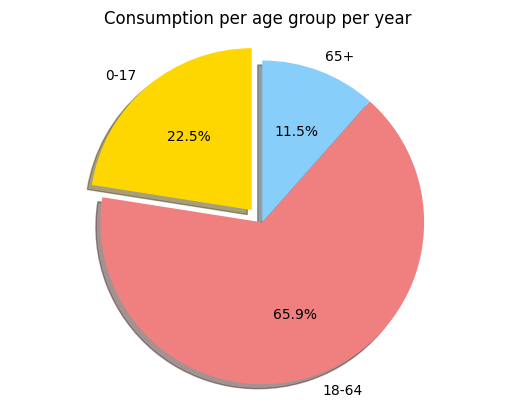

In [38]:
import matplotlib.pyplot as plt

labels = '0-17', '18-64', '65+'
sizes = [consum_0_17, consum_18_64, consum_65_plus]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Consumption per age group per year')